# Mapping GIS Data in Python


In [ ]:
!pip freeze

absl-py==0.12.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
appdirs==1.4.4
argon2-cffi==20.1.0
arviz==0.11.2
astor==0.8.1
astropy==4.2.1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.9
atomicwrites==1.4.0
attrs==21.2.0
audioread==2.1.9
autograd==1.3
Babel==2.9.1
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.3.0
blis==0.4.1
bokeh==2.3.2
Bottleneck==1.3.2
branca==0.4.2
bs4==0.0.1
CacheControl==0.12.6
cached-property==1.5.2
cachetools==4.2.2
catalogue==1.0.0
certifi==2021.5.30
cffi==1.14.5
cftime==1.5.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3.12.0
cmdstanpy==0.9.5
colorcet==2.0.6
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.3.2
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.3
cvxopt==1.2.6
cvxpy==1.0.31
cycler==0.10.0
cymem==2.0.5
Cython==0.29.23
daft==0.0.4
dask==2.12.0
datascience==0.10.6
debugpy==1.0.0
decorator==4.4.2
defusedxml==0.7.1
descartes==1.1.0
dill==0.3.4
distributed==1.25.3
dlib==19.18.0
dm-tree==0.1.

In [ ]:
# Agregue paquetes gis al entorno colab
!pip install geopandas
!apt-get install -y libspatialindex-dev
!pip install rtree

     |████████████████████████████████| 1.0MB 3.8MB/s 
     |████████████████████████████████| 6.6MB 35.3MB/s 
     |████████████████████████████████| 15.4MB 181kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 1s (694 kB/s)
Selecting previously un

In [ ]:
# Agregar paquetes al notebook
import pandas as pd # proporciona una interfaz para interactuar con datos tabulares
import geopandas as gpd  # combina las capacidades de los pandas y bien formado para operaciones geoespaciales
from shapely.geometry import Point, Polygon, MultiPolygon   # para manipular datos de texto en formas geoespaciales
from shapely import wkt  # significa "texto conocido", permite el intercambio entre programas GIS
import rtree  # admite unión geoespacial

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) # conecta Colab a su Google Drive
root_path = 'gdrive/My Drive/gis/' # establece la ruta raíz a la carpeta donde cargaste los datos

Mounted at /content/gdrive


In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
# Importe el archivo PUD como un geodataframe e inicialice el Sistema de referencia de coordenadas (CRS)
puds = gpd.read_file(root_path+'input/Planned_Unit_Development_PUDs.shp', crs = {'init' :'epsg:4326'})

aff = pd.read_csv(root_path+'input/Affordable_Housing.csv')
crosswalk = pd.read_csv(root_path+'input/zoning_crosswalk.csv')

In [ ]:
# ¿Cuáles son algunos de los pasos iniciales para comprender el contenido de estos conjuntos de datos?
puds.sample(3)

,OBJECTID,PUD_NAME,PUD_WEB_UR,PUD_CHANGE,PUD_ZONING,PUD_STATUS,PUD_CASE_N,SHAPEAREA,SHAPELEN,GLOBALID,WARD,geometry
83,75577,United House of Prayer for All People,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Official Digital Zoning Map of July 1, 2010",C-2-B,Final,09-05A,0,0,{CE96E4B0-8739-4458-9BB1-0E2819B7D503},Ward 6,"POLYGON ((-77.02105 38.91346, -77.02102 38.913..."
220,75643,GWU - Site 77A,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Case 06-11J/06-12J, Approved July 25 2013",C-3-C,Final,06-11J/06-12J,0,0,{99F1C829-5178-485B-922C-4AB5C454F507},Ward 2,"POLYGON ((-77.04793 38.90058, -77.04774 38.900..."
120,75733,Stanton Square LLC,https://app.dcoz.dc.gov/Content/Search/ViewCas...,"Setdown 7/27/15, Approved 4/11/16, DC Register...","R-5-A, SP-1",Final,13-09B,0,0,{DF09DA26-9826-4619-AD5A-FCD361B54921},Ward 8,"POLYGON ((-76.98687 38.85618, -76.98675 38.856..."


In [ ]:
puds.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    283 non-null    int64   
 1   PUD_NAME    283 non-null    object  
 2   PUD_WEB_UR  283 non-null    object  
 3   PUD_CHANGE  283 non-null    object  
 4   PUD_ZONING  283 non-null    object  
 5   PUD_STATUS  283 non-null    object  
 6   PUD_CASE_N  283 non-null    object  
 7   SHAPEAREA   283 non-null    int64   
 8   SHAPELEN    283 non-null    int64   
 9   GLOBALID    283 non-null    object  
 10  WARD        283 non-null    object  
 11  geometry    283 non-null    geometry
dtypes: geometry(1), int64(3), object(8)
memory usage: 26.7+ KB


In [ ]:
aff.sample(5)

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,LONGITUDE,AFFORDABLE_UNITS_AT_0_30_AMI,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,ADDRESS_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM
154,-77.023149,38.930201,414,Ward 1,"3205 Georgia Avenue NW, Washington, District o...",Georgia Gibson,Completed 2015 to Date,DHCD,5,38.930230,-77.023146,0,3,0,2,0,NaN,218154.0,397993.04,140257.22,3205 GEORGIA AVENUE NW,2019-12-30T04:00:25.000Z
418,-77.011842,38.870900,1212,Ward 6,"1550 1st St SW, Washington, District of Columb...",1550 1st St SW,Under Construction,DCHA DCHFA DHCD OP,76,38.870893,-77.011839,16,60,0,0,0,17-13,60745.0,398972.59,133674.20,1550 1ST STREET SW,2019-12-30T04:00:25.000Z
199,-77.042477,38.909892,1040,Ward 2,"15 Dupont Circle, NW, Washington, District of ...",Patterson House,Completed 2015 to Date,DHCD,7,38.909885,-77.042475,0,0,0,7,0,NaN,225555.0,396316.05,138003.42,15 DUPONT CIRCLE NW,2019-12-30T04:00:25.000Z
135,-77.002423,38.828294,330,Ward 8,"4319 3rd Street Southeast, Washington, Distric...",Atlantic Terrace,Completed 2015 to Date,DCHFA DHCD,195,38.828286,-77.002420,78,117,0,0,0,NaN,295776.0,399789.84,128944.51,4319 3RD STREET SE,2019-12-30T04:00:25.000Z
100,-76.910744,38.893148,205,Ward 7,"323 63rd Street Northeast, Washington, Distric...","Pleasant Park Cooperative, Inc.",Completed 2015 to Date,DHCD,41,38.893140,-76.910742,14,19,3,4,1,NaN,148655.0,407743.33,136147.59,323 63RD STREET NE,2019-12-30T04:00:25.000Z


In [ ]:
aff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   X                              449 non-null    float64
 1   Y                              449 non-null    float64
 2   OBJECTID                       451 non-null    int64  
 3   MAR_WARD                       429 non-null    object 
 4   ADDRESS                        439 non-null    object 
 5   PROJECT_NAME                   451 non-null    object 
 6   STATUS_PUBLIC                  451 non-null    object 
 7   AGENCY_CALCULATED              451 non-null    object 
 8   TOTAL_AFFORDABLE_UNITS         451 non-null    int64  
 9   LATITUDE                       396 non-null    float64
 10  LONGITUDE                      398 non-null    float64
 11  AFFORDABLE_UNITS_AT_0_30_AMI   451 non-null    int64  
 12  AFFORDABLE_UNITS_AT_31_50_AMI  451 non-null    int

In [ ]:
crosswalk.sample(3)

,Zone,Count,Zone_Cat
35,"R-5-B, C-2-B, C-2-A",1,Other/Mixed Use
57,"R-5-B, HS-H/C-2-B",1,Other/Mixed Use
62,ARTS/CR,1,Other/Mixed Use


In [ ]:
# Cree una columna de geometría en el marco de datos de viviendas asequibles

aff['geometry'] = aff.apply(lambda row: Point(row.X, row.Y), axis=1) 
aff = gpd.GeoDataFrame(aff, crs={'init' :'epsg:4326'})

In [ ]:
aff.sample(1)

,X,Y,OBJECTID,MAR_WARD,ADDRESS,PROJECT_NAME,STATUS_PUBLIC,AGENCY_CALCULATED,TOTAL_AFFORDABLE_UNITS,LATITUDE,LONGITUDE,AFFORDABLE_UNITS_AT_0_30_AMI,AFFORDABLE_UNITS_AT_31_50_AMI,AFFORDABLE_UNITS_AT_51_60_AMI,AFFORDABLE_UNITS_AT_61_80_AMI,AFFORDABLE_UNITS_AT_81_AMI,CASE_ID,ADDRESS_ID,XCOORD,YCOORD,FULLADDRESS,GIS_LAST_MOD_DTTM,geometry
60,-76.990626,38.863386,92,Ward 8,"2252 Martin Luther King Jr Ave SE, Washington,...",Maple View Flats (Big K),Completed 2015 to Date,DCHFA DHCD,114,38.863193,-76.990923,0,0,114,0,0,NaN,49963.0,400813.72,132840.1,2228 MARTIN LUTHER KING JR AVENUE SE,2019-12-30T04:00:25.000Z,POINT (-76.99063 38.86339)


In [ ]:
# Utilice la combinación geoespacial para identificar qué PUD incluyen proyectos de vivienda asequible

puds_aff = gpd.sjoin(puds, aff, op='intersects', how='left')

In [ ]:
puds_aff.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 288 entries, 0 to 282
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   OBJECTID_left                  288 non-null    int64   
 1   PUD_NAME                       288 non-null    object  
 2   PUD_WEB_UR                     288 non-null    object  
 3   PUD_CHANGE                     288 non-null    object  
 4   PUD_ZONING                     288 non-null    object  
 5   PUD_STATUS                     288 non-null    object  
 6   PUD_CASE_N                     288 non-null    object  
 7   SHAPEAREA                      288 non-null    int64   
 8   SHAPELEN                       288 non-null    int64   
 9   GLOBALID                       288 non-null    object  
 10  WARD                           288 non-null    object  
 11  geometry                       288 non-null    geometry
 12  index_right                 

In [ ]:
# Fusionar marco de datos con categorías de zonificación paso de peatones

puds_info = puds_aff.merge(crosswalk[['Zone_Cat']], how='left', left_on='PUD_ZONING', right_on=crosswalk['Zone'])

In [ ]:
print(f"Recuento total de PUDs: {puds_info.shape[0]}")
print(f"Cuente los PUD que ofrecen viviendas asequibles: {puds_info.loc[~puds_info.PROJECT_NAME.isna()].shape[0]}")

Total count of PUDs: 288
Count PUDs offering Affordable Housing: 66


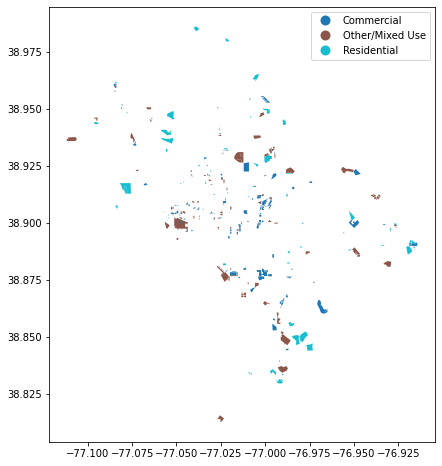

In [ ]:
# Crear un mapa de PUD por categoría de zonificación

puds_info.plot(column='Zone_Cat', legend=True, figsize=(16,8));

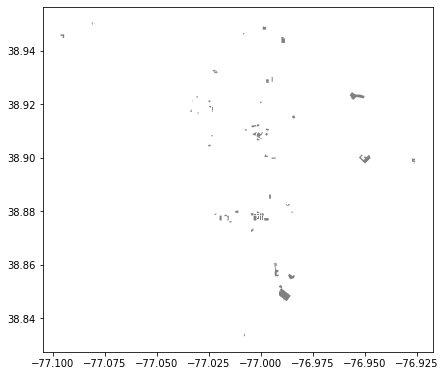

In [ ]:
# Crear un mapa de solo los PUD que brindan vivienda asequible

puds_info[puds_info['TOTAL_AFFORDABLE_UNITS']>0].plot(column='TOTAL_AFFORDABLE_UNITS', color='grey', figsize=(16,6.35));

In [ ]:
# Exportar geodataframe como shapefile dentro del entorno Colab

puds_info.to_file('puds_info.shp')

In [ ]:
# Copie los componentes del shapefile del entorno Colab a Google Drive usando el script bash

!cp puds_info.cpg 'gdrive/My Drive/gis/output/0318_wwc_gis/viz'
!cp puds_info.dbf 'gdrive/My Drive/gis/output/0318_wwc_gis/viz'
!cp puds_info.prj 'gdrive/My Drive/gis/output/0318_wwc_gis/viz'
!cp puds_info.shp 'gdrive/My Drive/gis/output/0318_wwc_gis/viz'
!cp puds_info.shx 'gdrive/My Drive/gis/output/0318_wwc_gis/viz'


cp: cannot create regular file 'gdrive/My Drive/gis/output/0318_wwc_gis/viz': No such file or directory
cp: cannot create regular file 'gdrive/My Drive/gis/output/0318_wwc_gis/viz': No such file or directory
cp: cannot create regular file 'gdrive/My Drive/gis/output/0318_wwc_gis/viz': No such file or directory
cp: cannot create regular file 'gdrive/My Drive/gis/output/0318_wwc_gis/viz': No such file or directory
cp: cannot create regular file 'gdrive/My Drive/gis/output/0318_wwc_gis/viz': No such file or directory
